<a href="https://colab.research.google.com/github/n9quan/QR_Colab/blob/main/WS_1.3_Frequency_table_Histogram_Nguyen_Chinh_Quan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variation in temperature over time

Aside from changes in the mean temperature, the government is also worried that climate change will result in more frequent extreme weather events. The island has experienced a few major storms and severe heat waves in the past, both of which caused serious damage and disruption to economic activity.

Will weather become more extreme and vary more as a result of climate change? A [*New York Times* article](https://tinyco.re/8697554) uses the same temperature dataset you have been using to investigate the distribution of temperatures and temperature variability over time. Read through the article, paying close attention to the descriptions of the temperature distributions.

To visualize distributions, we can use column charts (sometimes referred to as frequency histograms). We are now going to create similar charts of temperature distributions to the ones in the New York Times article.

## Getting started

As before, we first have to import the necessary libraries and upload our datafile. It is good practice to import all of the libraries you plan to use at the top of your file. This makes it easier to keep track of them and to investigate any potential issues.

**Exercise:** Using the instructions from the [previous notebook](https://colab.research.google.com/drive/1X4BVSb-0WZUdf2Y8r7NKiYOf03CVvp-6?usp=sharing), import `pandas` and `matplotlib.pyplot` as `pd` and `plt`.

In [ ]:
# Solution goes here
import pandas as pd
import matplotlib.pyplot as plt

Next, use the code provided here to upload our datafile.

In [ ]:
from google.colab import files
import io

uploaded = files.upload()
tempdata = pd.read_csv(io.BytesIO(uploaded["NH.Ts+dSST.csv"]), skiprows = 1, na_values = "***")

In [ ]:
tempdata.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.39,-0.53,-0.23,-0.30,-0.05,-0.18,-0.21,-0.25,-0.24,-0.30,-0.43,-0.42,-0.29,NaN,NaN,-0.19,-0.21,-0.32
1,1881,-0.30,-0.24,-0.05,-0.02,0.05,-0.33,0.10,-0.04,-0.28,-0.44,-0.36,-0.23,-0.18,-0.19,-0.32,-0.01,-0.09,-0.36
2,1882,0.26,0.21,0.02,-0.30,-0.23,-0.28,-0.28,-0.14,-0.24,-0.51,-0.33,-0.68,-0.21,-0.17,0.08,-0.17,-0.23,-0.36
3,1883,-0.58,-0.66,-0.15,-0.30,-0.25,-0.11,-0.05,-0.22,-0.34,-0.16,-0.44,-0.15,-0.29,-0.33,-0.64,-0.24,-0.13,-0.31
4,1884,-0.16,-0.11,-0.64,-0.59,-0.36,-0.41,-0.41,-0.51,-0.45,-0.44,-0.57,-0.47,-0.43,-0.40,-0.14,-0.53,-0.44,-0.49


In [ ]:
tempdata

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.39,-0.53,-0.23,-0.30,-0.05,-0.18,-0.21,-0.25,-0.24,-0.30,-0.43,-0.42,-0.29,NaN,NaN,-0.19,-0.21,-0.32
1,1881,-0.30,-0.24,-0.05,-0.02,0.05,-0.33,0.10,-0.04,-0.28,-0.44,-0.36,-0.23,-0.18,-0.19,-0.32,-0.01,-0.09,-0.36
2,1882,0.26,0.21,0.02,-0.30,-0.23,-0.28,-0.28,-0.14,-0.24,-0.51,-0.33,-0.68,-0.21,-0.17,0.08,-0.17,-0.23,-0.36
3,1883,-0.58,-0.66,-0.15,-0.30,-0.25,-0.11,-0.05,-0.22,-0.34,-0.16,-0.44,-0.15,-0.29,-0.33,-0.64,-0.24,-0.13,-0.31
4,1884,-0.16,-0.11,-0.64,-0.59,-0.36,-0.41,-0.41,-0.51,-0.45,-0.44,-0.57,-0.47,-0.43,-0.40,-0.14,-0.53,-0.44,-0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2018,1.14,1.24,1.17,0.97,1.01,0.86,0.90,0.87,0.97,1.24,0.97,1.10,1.04,1.06,1.26,1.05,0.88,1.06
139,2019,1.20,1.12,1.54,1.25,0.99,1.20,1.03,1.09,1.21,1.31,1.20,1.39,1.21,1.19,1.14,1.26,1.11,1.24
140,2020,1.58,1.70,1.66,1.40,1.28,1.13,1.11,1.13,1.20,1.22,1.61,1.23,1.35,1.37,1.56,1.45,1.12,1.34
141,2021,1.26,0.96,1.19,1.11,1.03,1.20,1.06,1.01,1.05,1.31,1.30,1.14,1.14,1.14,1.15,1.11,1.09,1.22


## Creating frequency tables and histograms

In order to create a column chart using the temperature data we have, we first need to summarize the data using a frequency table. A frequency table is a record of how many observations in a dataset have a particular value, range of values, or belong to a particular category.

Instead of using deciles to group the data, we use intervals of 0.05, so that temperature anomalies with a value from −0.3 to −0.25 will be in one group, a value greater than −0.25 and up to 0.2 in another group, and so on. The frequency table shows us how many values belong to a particular group.

Range of Temperature Anomaly | Frequency
--- | ---
-0.30 – -0.25 | 
-0.25 – -0.20 | 
... | 
0.95 – 1.00 | 
1.00 – 1.05 | 

In the following, we will use the monthly data for June, July, and August to create a frequency table for the years 1921–1950. The values in the first column should range from −0.3 to 1.05, in intervals of 0.05.

Since we will be looking at data from different subperiods (year intervals) separately, we first need to select the relevant subset of the data. For example, the following returns data for the years from 1921 onwards.

In [ ]:
tempdata[tempdata["Year"] == 2015]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
135,2015,1.18,1.19,1.32,1.02,1.04,1.05,0.92,1.02,1.17,1.29,1.38,1.53,1.18,1.14,1.15,1.13,1.0,1.28


We can use the expressions below when selecting data.

* Equals: `==`
* Not equals: `!=`
* Greater than, less than: `>` or `<`
* Greater than or equal to: `>=`
* Less than or equal to: `<=`

**Exercise:** Experiment with selecting various subsets of the temperature data.

In [ ]:
# Solution goes here
tempdata[tempdata['Jan']>1.0]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
122,2002,1.02,1.14,1.11,0.51,0.52,0.68,0.66,0.55,0.62,0.54,0.79,0.42,0.71,0.73,0.94,0.71,0.63,0.65
127,2007,1.45,0.90,0.96,1.07,0.72,0.65,0.66,0.73,0.67,0.83,0.82,0.77,0.85,0.88,1.17,0.92,0.68,0.78
135,2015,1.18,1.19,1.32,1.02,1.04,1.05,0.92,1.02,1.17,1.29,1.38,1.53,1.18,1.14,1.15,1.13,1.00,1.28
136,2016,1.55,1.94,1.91,1.48,1.12,1.12,1.04,1.12,1.22,1.03,1.12,1.04,1.31,1.35,1.68,1.50,1.09,1.12
137,2017,1.38,1.52,1.52,1.20,0.92,0.93,0.97,1.02,1.01,1.05,1.22,1.39,1.18,1.15,1.32,1.21,0.97,1.09
138,2018,1.14,1.24,1.17,0.97,1.01,0.86,0.90,0.87,0.97,1.24,0.97,1.10,1.04,1.06,1.26,1.05,0.88,1.06
139,2019,1.20,1.12,1.54,1.25,0.99,1.20,1.03,1.09,1.21,1.31,1.20,1.39,1.21,1.19,1.14,1.26,1.11,1.24
140,2020,1.58,1.70,1.66,1.40,1.28,1.13,1.11,1.13,1.20,1.22,1.61,1.23,1.35,1.37,1.56,1.45,1.12,1.34
141,2021,1.26,0.96,1.19,1.11,1.03,1.20,1.06,1.01,1.05,1.31,1.30,1.14,1.14,1.14,1.15,1.11,1.09,1.22
142,2022,1.25,1.17,1.42,1.09,0.99,1.12,1.05,1.17,NaN,NaN,NaN,NaN,NaN,NaN,1.19,1.17,1.12,NaN


It is also possible to combine several of these statements. In this case, each condition must be surrounded by parentheses `()` and can be connected with the `&` operator.

In [ ]:
period = tempdata[(tempdata["Year"] >= 1921) & (tempdata["Year"] <= 1950)]

Here, we have assigned the result of this operation to a new variable called `period`. (We have chosen this name to reflect its content, but almost any name would have been acceptable.) You can convince yourself that this was successful by viewing the `period` variable.

In [ ]:
period

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
41,1921,0.18,-0.09,-0.12,-0.18,-0.25,-0.15,-0.03,-0.30,-0.18,-0.01,-0.10,-0.13,-0.11,-0.16,-0.21,-0.18,-0.16,-0.09
42,1922,-0.38,-0.63,-0.12,-0.16,-0.20,-0.16,-0.29,-0.37,-0.44,-0.33,-0.14,-0.15,-0.28,-0.28,-0.38,-0.16,-0.27,-0.31
43,1923,-0.19,-0.47,-0.39,-0.53,-0.39,-0.25,-0.30,-0.28,-0.18,0.05,0.15,0.08,-0.22,-0.24,-0.27,-0.44,-0.27,0.01
44,1924,-0.29,-0.22,0.02,-0.29,-0.06,-0.20,-0.23,-0.27,-0.23,-0.24,0.10,-0.37,-0.19,-0.15,-0.14,-0.11,-0.23,-0.13
45,1925,-0.29,-0.39,-0.24,-0.16,-0.22,-0.26,-0.26,-0.19,-0.05,-0.09,0.22,0.22,-0.14,-0.19,-0.35,-0.20,-0.23,0.03
46,1926,0.52,0.18,0.37,-0.12,-0.23,-0.20,-0.20,-0.06,-0.03,0.06,0.17,-0.29,0.01,0.06,0.31,0.01,-0.15,0.07
47,1927,-0.29,-0.08,-0.47,-0.27,-0.13,-0.14,-0.08,-0.16,0.03,0.24,0.10,-0.37,-0.13,-0.13,-0.22,-0.29,-0.12,0.12
48,1928,0.27,0.09,-0.23,-0.31,-0.17,-0.32,-0.10,-0.19,-0.16,-0.08,0.05,-0.04,-0.10,-0.13,0.00,-0.24,-0.20,-0.06
49,1929,-0.56,-0.79,-0.18,-0.35,-0.28,-0.39,-0.36,-0.20,-0.20,-0.01,-0.02,-0.65,-0.33,-0.28,-0.46,-0.27,-0.32,-0.08
50,1930,-0.11,-0.19,0.11,-0.15,-0.19,-0.12,-0.03,0.02,-0.02,0.02,0.44,0.09,-0.01,-0.07,-0.32,-0.08,-0.04,0.15


We need to use all monthly anomalies from June, July, and August, but they are currently in three separate columns. We will use the `concat` (concatenate) function to create one new variable (called `temp_summer`) that contains all these values.

In [ ]:
tempKhang = tempdata[(tempdata['Jan'] < 0.0) & (tempdata['Jan']> -0.2)]
tempKhang

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
4,1884,-0.16,-0.11,-0.64,-0.59,-0.36,-0.41,-0.41,-0.51,-0.45,-0.44,-0.57,-0.47,-0.43,-0.40,-0.14,-0.53,-0.44,-0.49
19,1899,-0.13,-0.65,-0.59,-0.23,-0.25,-0.36,-0.17,-0.07,-0.05,0.04,0.35,-0.48,-0.21,-0.20,-0.35,-0.36,-0.20,0.12
22,1902,-0.18,0.01,-0.39,-0.39,-0.39,-0.36,-0.33,-0.28,-0.34,-0.30,-0.45,-0.60,-0.33,-0.32,-0.19,-0.39,-0.33,-0.36
36,1916,-0.10,-0.17,-0.39,-0.35,-0.36,-0.51,-0.34,-0.38,-0.50,-0.36,-0.47,-1.14,-0.42,-0.35,-0.18,-0.37,-0.41,-0.44
40,1920,-0.15,-0.29,-0.01,-0.21,-0.22,-0.27,-0.26,-0.32,-0.36,-0.41,-0.46,-0.72,-0.30,-0.29,-0.33,-0.14,-0.28,-0.41
43,1923,-0.19,-0.47,-0.39,-0.53,-0.39,-0.25,-0.30,-0.28,-0.18,0.05,0.15,0.08,-0.22,-0.24,-0.27,-0.44,-0.27,0.01
50,1930,-0.11,-0.19,0.11,-0.15,-0.19,-0.12,-0.03,0.02,-0.02,0.02,0.44,0.09,-0.01,-0.07,-0.32,-0.08,-0.04,0.15
53,1933,-0.18,-0.30,-0.31,-0.16,-0.26,-0.32,-0.14,-0.14,-0.28,-0.17,-0.24,-0.54,-0.25,-0.23,-0.23,-0.24,-0.20,-0.23
54,1934,-0.14,0.33,-0.27,-0.29,0.08,-0.01,-0.04,-0.09,-0.13,0.13,0.27,0.18,0.00,-0.06,-0.12,-0.16,-0.05,0.09
60,1940,-0.10,0.14,0.04,0.28,0.17,0.17,0.16,0.07,0.27,0.29,0.31,0.37,0.18,0.21,0.28,0.16,0.13,0.29


In [ ]:
temp_summer = pd.concat([period["Jun"], period["Jul"], period["Aug"]])

Notice that we are using our newly created `period` variable here.

**Exercise:** Again, convince yourself that this operation was successful.


In [ ]:
# Solution goes here
temp_summer

41   -0.15
42   -0.16
43   -0.25
44   -0.20
45   -0.26
      ... 
66   -0.10
67   -0.04
68    0.03
69   -0.04
70   -0.20
Length: 90, dtype: float64

Now we have one long variable (`temp_summer`), with the monthly temperature anomalies for the three months (from 1921 to 1950) attached to each other. 

We can use the `value_counts` command to produce a frequency table.

In [ ]:
temp_summer.value_counts()

-0.20    6
-0.14    6
-0.04    5
-0.06    4
 0.17    3
-0.03    3
 0.08    3
 0.15    3
 0.09    3
 0.00    3
-0.08    2
 0.05    2
-0.10    2
-0.19    2
-0.07    2
-0.16    2
 0.03    2
-0.02    2
 0.16    2
-0.32    2
-0.26    2
-0.30    2
-0.37    1
-0.18    1
-0.15    1
-0.28    1
-0.27    1
 0.01    1
 0.02    1
-0.09    1
 0.07    1
 0.19    1
 0.10    1
-0.11    1
-0.23    1
 0.06    1
 0.14    1
 0.25    1
-0.36    1
-0.29    1
-0.05    1
 0.11    1
 0.21    1
 0.04    1
-0.01    1
-0.12    1
-0.39    1
-0.25    1
 0.28    1
dtype: int64

There are still two changes we need to make. The first is that the `value_counts` command automatically sorts the frequency table in descending order. To disable this behavior, we can include the `sort = False` option inside the parentehsis.

The second is that our frequency table currently does not contain intervals of 0.05 degrees, but simply counts how often each indivdual value appears. To address this, we can specify the `bins` that `value_counts` should use. For instance, in our case, the range from -0.30 to -0.25 is considered one bin.

We can specify the bin width by providing a list of values that represent the boundaries. So, in our case, we would want to provide a list `[-0.30, -0.25, -0.20, ..., 0.95, 1.00, 1.05]`. However, creating such a list by hand would be quite tedious, especially when dealing which larger datasets. Thankfully, Python provides a way to create such a list using the `arange` command, which is provided by the `numpy` library (which stands for "Numerical Python" and is often abbreviated as `np`).

The `arange` command takes three arguments.

1. The starting value (in our case -0.30)
2. One step past the last value (in our case 1.10)
3. The desired interval or step size (in our case 0.05)

We assign the resulting list to a variable named `bin_width`.


In [ ]:
import numpy as np
bin_width = np.arange(-0.30, 1.10, 0.05)
bin_width

array([-3.00000000e-01, -2.50000000e-01, -2.00000000e-01, -1.50000000e-01,
       -1.00000000e-01, -5.00000000e-02, -5.55111512e-17,  5.00000000e-02,
        1.00000000e-01,  1.50000000e-01,  2.00000000e-01,  2.50000000e-01,
        3.00000000e-01,  3.50000000e-01,  4.00000000e-01,  4.50000000e-01,
        5.00000000e-01,  5.50000000e-01,  6.00000000e-01,  6.50000000e-01,
        7.00000000e-01,  7.50000000e-01,  8.00000000e-01,  8.50000000e-01,
        9.00000000e-01,  9.50000000e-01,  1.00000000e+00,  1.05000000e+00,
        1.10000000e+00])

We can now run the `value_counts` command again with the additional options.

In [ ]:
temp_summer.value_counts(bins = bin_width, sort = False)

(-0.301, -0.25]        8
(-0.25, -0.2]          7
(-0.2, -0.15]          5
(-0.15, -0.1]          9
(-0.1, -0.05]         11
(-0.05, -5.55e-17]    12
(-5.55e-17, 0.05]      8
(0.05, 0.1]           10
(0.1, 0.15]            3
(0.15, 0.2]            9
(0.2, 0.25]            1
(0.25, 0.3]            2
(0.3, 0.35]            0
(0.35, 0.4]            0
(0.4, 0.45]            0
(0.45, 0.5]            0
(0.5, 0.55]            0
(0.55, 0.6]            0
(0.6, 0.65]            0
(0.65, 0.7]            0
(0.7, 0.75]            0
(0.75, 0.8]            0
(0.8, 0.85]            0
(0.85, 0.9]            0
(0.9, 0.95]            0
(0.95, 1.0]            0
(1.0, 1.05]            0
(1.05, 1.1]            0
dtype: int64

**Exercise:** Using the monthly data for June, July, and August, create two frequency tables similar to the one we just created for the years 1951–1980 and 1981–2010 respectively. As before, the values in the first column should range from −0.3 to 1.05, in intervals of 0.05.

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

From the output you can see that we can get the temperature ranges and the frequencies, which is all we need to create a frequency table. However, in our case the frequency table is merely a temporary input required to produce a histogram.

To do so, we can use the `hist` command on our `temp_summer` data. As with the `value_counts`, we have to specify the `bins` again. Finally, the `edgecolor = black` option draws borders around each bar in the histogram.

Text(0.5, 1.0, 'My Histogram')

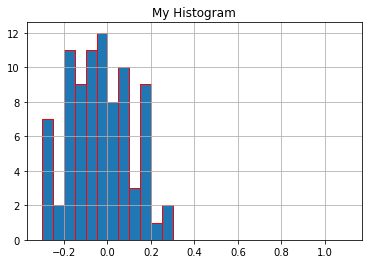

In [ ]:
temp_summer.hist(bins = bin_width, edgecolor = "red")
plt.title("My Histogram")

The height of these bars gives a useful overview of the distribution of the temperature anomalies.

**Exercise:** Use the code from the previous notebook to add a title, as well as labels on the x and y axes. (You will need to include these commands in the same code block as the `hist` command.)

In [ ]:
# Solution goes here

**Exercise:** Plot two separate column charts (frequency histograms) for 1951–1980 and 1981–2010 to show the distribution of temperatures, with frequency on the vertical axis and the range of temperature anomaly on the horizontal axis. Your charts should look similar to those in the New York Times article.

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

Now consider how this distribution changes as we move through the three distinct time periods. The distribution is clearly moving to the right for the period 1981–2010, which is an indication that the temperature is increasing; in other words, an indication of global warming.

## Optional: Graphing density plots for two different periods on the same graph and adding a legend

You can start graphing the temperature distribution of two different time periods (1921-1950 and 1981-2010) on the same graph to compare how the temperature distribution has shifted over time.

A density plot is a way of estimating the shape of a distribution, which makes it convenient for us to draw a very smooth line around the histogram.

As you are plotting two lines for two different time periods over the graph, you should also be able to label the lines using a graph legend so that the viewers can differentiate between the two lines.

You should be able to reproduce this graph (similar to that in the NYT article) at the end of the section.


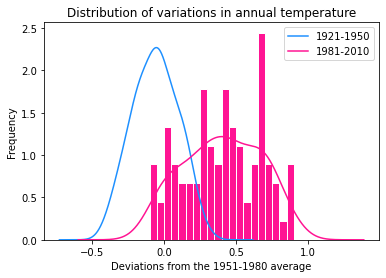


As the plot uses density values as opposed to absolute values, you will have to specify `density = True` in the `hist()` function to graph the histogram of the 1981-2021 period. Then, graph the density plot for the two periods. Then add the legend of the graph using the `plt.legend()` function. Remember to put all of these functions into the same block of code.

In [ ]:
# Change temp_summer_2 to the variable name you used to plot the 1981-2010 period in the previous section
temp_summer_2.hist(bins = bin_width, density = True) 

# Add density plot (also change temp_summer_2 to the variable name you used)
# Specify the label of the lines so that you can add a graph legend later
temp_summer_2.plot(kind = "density", label = "1981-2010")
temp_summer.plot(kind = "density", label = "1921-1950")

# Add appriopriate titles for the graph and labels for the axes
plt.ylabel("Frequency")
plt.xlabel("Deviations from the 1951-1980 average")
plt.title("Distribution of variations in annual temperature")

# Add a legend to the graph to label the lines
plt.legend()

With this code, you should be able to plot the graph as demonstrated above with a histogram for the 1981-2010 period and two function lines for the two periods. You can practice graphing the lines by comparing another pair of periods as well.

In [ ]:
# Solution goes here